# 4 Musketeers Code Demo
## Introduction - <what do we do for this program?>



#### Setup

In [6]:
pip install --user --upgrade google-cloud-language

Note: you may need to restart the kernel to use updated packages.


In [9]:
# %matplotlib inline
# ! pip install --user pandas
# ! pip install --user numpy
# ! pip install --user matplotlib

#### Set up functions to call Google Natural Language API
Sentiment Analysis:

In [11]:
import utils
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
# visualization (code test) 
def text_sentiment_line_chart(df_sentiment_score):
    df_sentiment_score.plot(kind='line', y='sentiment score', x=df_sentiment_score.index+1)

    # Build the chart graphic
    ax = plt.axes()
    ax.grid()
    ax.margins(0) # remove default margins (matplotlib verision 2+)
    ax.axhspan(0, 2.0, facecolor='bisque', alpha=0.5)
    ax.axhspan(-2.0, 0, facecolor='lightcoral', alpha=0.5)

    # Giving y label using xlabel() method 
    plt.ylabel("Sentiment Score", fontweight='bold')  
    # Giving title to the plot
    plt.title("Sentiment Score by Sentence", fontweight='bold')
    plt.show()
    
def process_one_file(file_name, country_code):
    df_sentiment_score = utils.get_basic_info(file_name, country_code)
    text_sentiment_line_chart(df_sentiment_score)

# Demo 1 - Process a single news article
### 1. Basic information
### 2. Visualization - bar chart for each sentence
<dl>
  <dt>Input</dt>
      <dd>- file name</dd>
  <dt>Output</dt>
      <dd>- basic info and Sentiment Score Chart</dd>
</dl>

There are total of  31  sentences in the artical.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


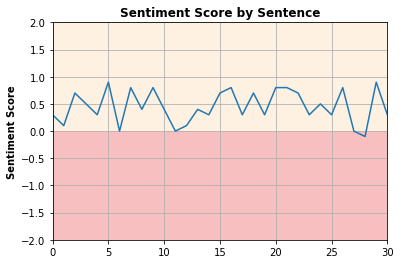

In [17]:
process_one_file("news_de_1.txt", 'DE')

## Demo 2 - Process multiple news article
### 1. Basic information
### 2. Visualization - bar chart for each sentence
<dl>
  <dt>Input</dt>
      <dd>- LIST of file names</dd>
  <dt>Output</dt>
      <dd>- basic info and Sentiment Score Chart</dd>
</dl>

y = 6*2

In [11]:
file_name_list = ['news1.txt', 'news2.txt', 'news3.txt']

There are total of  78  sentences in the artical.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


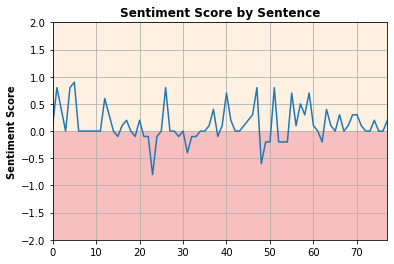

There are total of  18  sentences in the artical.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


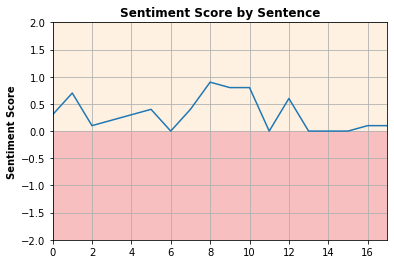

There are total of  13  sentences in the artical.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


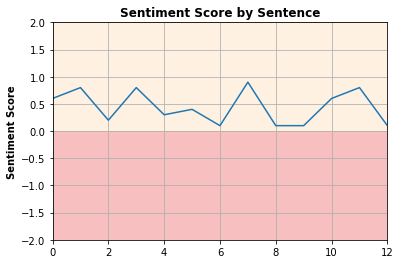

In [12]:
#print(file_name_list[0])
for x in file_name_list:
  process_one_file(x)

IndentationError: unexpected indent (<ipython-input-19-e6441b04208c>, line 8)